# importar recursos

In [68]:
import requests
from bs4 import BeautifulSoup
import csv
import os
import re
import csv
import spacy
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

!pip install -U spacy
!python -m spacy download es_core_news_sm
!python -m spacy download es_core_news_lg


# Definir la ruta del archivo en el escritorio
archivo_csv = os.path.join(os.path.expanduser("~"), "Escritorio", "datos_extraidos.csv")

     ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.9 MB 1.4 MB/s eta 0:00:10
     --------------------------------------- 0.0/12.9 MB 495.5 kB/s eta 0:00:26
     --------------------------------------- 0.1/12.9 MB 655.4 kB/s eta 0:00:20
      -------------------------------------- 0.2/12.9 MB 876.1 kB/s eta 0:00:15
      --------------------------------------- 0.3/12.9 MB 1.1 MB/s eta 0:00:12
      --------------------------------------- 0.3/12.9 MB 1.2 MB/s eta 0:00:11
     - -------------------------------------- 0.5/12.9 MB 1.4 MB/s eta 0:00:09
     - -------------------------------------- 0.6/12.9 MB 1.7 MB/s eta 0:00:08
     -- ------------------------------------- 0.7/12.9 MB 1.8 MB/s eta 0:00:07
     -- ------------------------------------- 0.9/12.9 MB 1.9 MB/s eta 0:00:07
     -- ------------------------------------- 0.9/12.9 MB 1.9 MB/s eta 0:00:07
     --- ------------------------------------ 1.0/12.9 M

ERROR: Wheel 'es-core-news-lg' located at C:\Users\USER\AppData\Local\Temp\pip-unpack-kyzwqjpz\es_core_news_lg-3.7.0-py3-none-any.whl is invalid.


# Bases de datos periodico el espectador

In [81]:
# Lista de URLs de la base de datos El espectador 
BASE_DATOS_espectador= [
"https://www.elespectador.com/opinion/columnistas/gloria-arias-nieto/la-terquedad-de-la-guerra/",
"https://www.elespectador.com/opinion/editorial/la-corte-constitucional-apoya-la-paz-total-con-estructura/",
"https://www.elespectador.com/opinion/columnistas/cristina-de-la-torre/predial-tierra-y-paz/",
"https://www.elespectador.com/opinion/columnistas/daniel-garcia-pena/repensando-la-paz-total/",
"https://www.elespectador.com/opinion/editorial/una-oportunidad-para-corregir-el-rumbo-de-la-paz/",
"https://www.elespectador.com/opinion/columnistas/cristina-de-la-torre/eln-quiere-la-paz-o-su-dictadura-armada/",
"https://www.elespectador.com/opinion/columnistas/gloria-arias-nieto/la-paz-como-cultura/",
"https://www.elespectador.com/opinion/columnistas/yesid-reyes-alvarado/cambie-de-opinion-sobre-la-ley-de-paz-total/",
"https://www.elespectador.com/opinion/columnistas/maria-alejandra-villamizar/obstruir-la-paz/",
"https://www.elespectador.com/opinion/columnistas/maria-teresa-ronderos/otra-negociacion-de-paz-sobre-terreno-quebrado/",
"https://www.elespectador.com/opinion/columnistas/cristina-de-la-torre/paz-volver-a-barajar/",
"https://www.elespectador.com/opinion/editorial/el-acuerdo-de-paz-no-entrego-al-pais/",
"https://www.elespectador.com/opinion/columnistas/felipe-zuleta-lleras/cual-paz-total/",
"https://www.elespectador.com/opinion/columnistas/mario-morales/nueve-procesos-de-paz-y-una-guerra-sin-cuartel/",
"https://www.elespectador.com/opinion/editorial/que-el-cese-al-fuego-perdure-y-lleve-a-un-acuerdo-de-paz/",
"https://www.elespectador.com/opinion/columnistas/gloria-arias-nieto/la-paz-en-construccion/",
"https://www.elespectador.com/opinion/editorial/la-esperanza-de-paz-no-admite-tantas-ambivalencias/",
"https://www.elespectador.com/opinion/columnistas/gloria-arias-nieto/notas-de-paz/",
"https://www.elespectador.com/opinion/columnistas/alejandro-alvarez/gobernabilidad-y-paz/",
"https://www.elespectador.com/opinion/columnistas/aldo-civico/el-desafio-de-la-paz/",
"https://www.elespectador.com/opinion/columnistas/pedro-viveros/paz-total-en-la-casa-de-narino/",
"https://www.elespectador.com/opinion/columnistas/cristina-nicholls/a-donde-se-fue-el-entusiasmo-por-la-paz/",
"https://www.elespectador.com/opinion/columnistas/oscar-sevillano/me-gusta-la-paz-total-pero/",
"https://www.elespectador.com/opinion/columnistas/juan-manuel-ospina/la-paz-total-simplemente-una-bella-aspiracion/",
"https://www.elespectador.com/opinion/columnistas/yolanda-ruiz/la-paz-entre-los-pacificadores/",
"https://www.elespectador.com/opinion/columnistas/gustavo-gallon/para-lograr-una-cultura-para-vivir-en-paz/",
"https://www.elespectador.com/opinion/columnistas/mario-morales/si-quieren-paz/",
"https://www.elespectador.com/opinion/columnistas/william-ospina/la-otra-paz/",
"https://www.elespectador.com/opinion/columnistas/juan-david-ochoa/paz-sobre-el-pantano/",
"https://www.elespectador.com/opinion/columnistas/alejandro-reyes-posada/las-cuatro-dimensiones-de-la-paz-total/",
"https://www.elespectador.com/opinion/columnistas/hernando-roa-suarez/la-paz-si-avancemos/"
]

# Lista para almacenar los datos extraídos
datos_extraidos = []

nombre_periodico = "El espectador"

# Iterar sobre cada URL de la base de datos
for URL_BASE in BASE_DATOS_espectador:
    pedido_obtenido = requests.get(URL_BASE)
    html_obtenido = pedido_obtenido.text
    soup = BeautifulSoup(html_obtenido, "html.parser")

    # Encontrar los elementos <div> con la clase "font--secondary"
    divs = soup.find_all(class_="font--secondary")

    # Crear una lista para almacenar los textos del artículo
    texto_articulo = []
    for div in divs:
        texto_articulo.append(div.text.strip())

    # Unir todos los textos del artículo en una cadena
    articulo_completo = " ".join(texto_articulo)

    # Extraer autor
    autor_div = soup.find("div", class_="ArticleHeader-Author")
    autor = autor_div.text.strip() if autor_div else "Autor no encontrado"

    # Extraer fecha de publicación
    fecha_div = soup.find("div", class_="Datetime ArticleHeader-Date")
    fecha = fecha_div.text.strip() if fecha_div else "Fecha no encontrada"

    # Contar el número de palabras del artículo
    num_palabras = len(articulo_completo.split())

    # Agregar los datos extraídos a la lista
    datos_extraidos.append([autor, fecha, num_palabras, articulo_completo])

# Crear el DataFrame de pandas con las columnas originales
columnas = ["Autor", "Fecha de Publicación", "Número de Palabras", "Texto del Artículo"]
df = pd.DataFrame(datos_extraidos, columns=columnas)

# Añadir el nombre del periódico a cada entrada
df["Nombre del Periódico"] = nombre_periodico

# Eliminar la columna de texto del artículo
df = df.drop(columns=["Texto del Artículo"])

# Mostrar las tres primeras filas del DataFrame
print(df)


# Escribir los datos extraídos en un archivo CSV
with open('datos_extraidoselespectador_descriptivo.csv', 'w', newline='', encoding='utf-8-sig') as archivo:
    escritor_csv = csv.writer(archivo)
    # Escribir la cabecera
    escritor_csv.writerow(["Autor", "Fecha de Publicación", "Número de Palabras", "Nombre del Periódico"])
    # Escribir los datos
    for index, row in df.iterrows():
        escritor_csv.writerow(row)


                         Autor                    Fecha de Publicación  \
0           Gloria Arias Nieto   05 de diciembre de 2023 - 02:00 a. m.   
1                El Espectador   04 de diciembre de 2023 - 02:00 a. m.   
2         Cristina de la Torre   28 de noviembre de 2023 - 02:05 a. m.   
3           Daniel García-Peña   28 de noviembre de 2023 - 02:00 a. m.   
4                El Espectador   24 de noviembre de 2023 - 02:00 a. m.   
5         Cristina de la Torre   12 de diciembre de 2023 - 02:05 a. m.   
6           Gloria Arias Nieto   12 de diciembre de 2023 - 02:05 a. m.   
7         Yesid Reyes Alvarado   05 de diciembre de 2023 - 02:05 a. m.   
8   María Alejandra Villamizar   20 de noviembre de 2023 - 02:05 a. m.   
9        María Teresa Ronderos   20 de noviembre de 2023 - 02:05 a. m.   
10        Cristina de la Torre   14 de noviembre de 2023 - 02:05 a. m.   
11               El Espectador     31 de octubre de 2023 - 02:00 a. m.   
12        Felipe Zuleta Lleras   12 de

# Analisis descriptivo

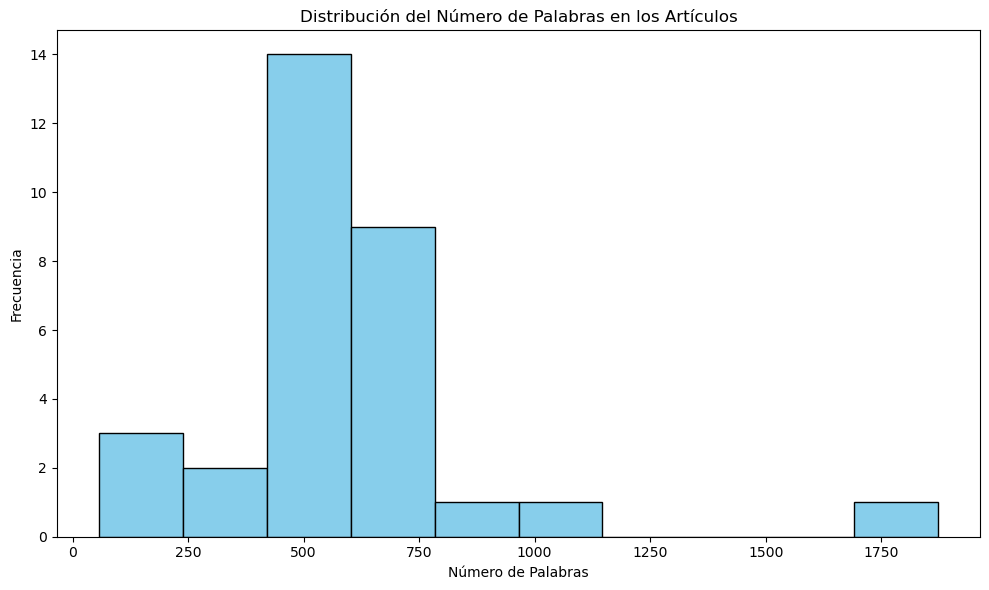

In [83]:
# Gráfica 1: Distribución del Número de Palabras
plt.figure(figsize=(10, 6))
plt.hist(df['Número de Palabras'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Número de Palabras')
plt.ylabel('Frecuencia')
plt.title('Distribución del Número de Palabras en los Artículos')
plt.tight_layout()
plt.show()

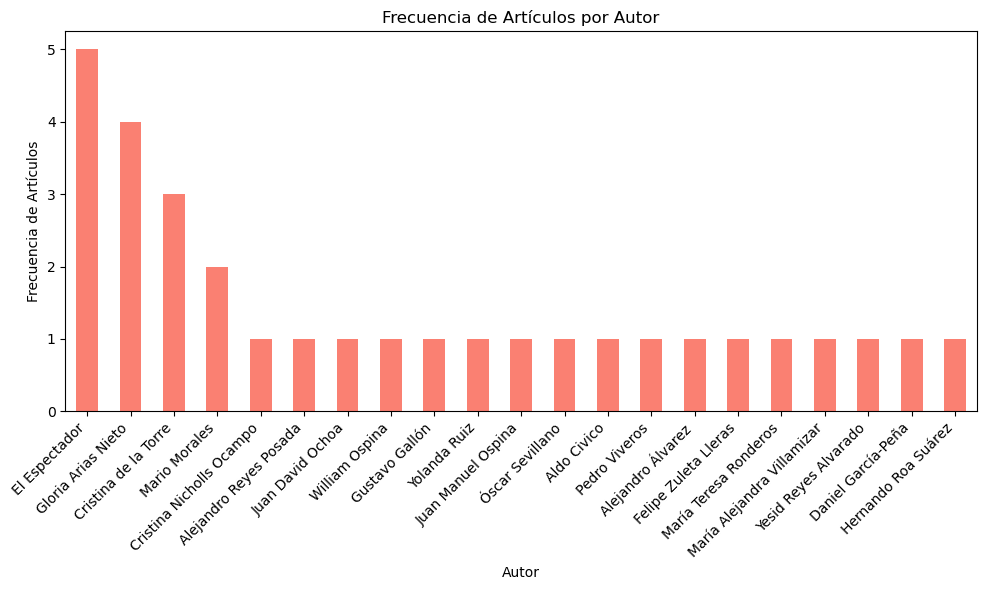

In [71]:
# Gráfica 2: Frecuencia de artículos por autor
plt.figure(figsize=(10, 6))
df['Autor'].value_counts().plot(kind='bar', color='salmon')
plt.xlabel('Autor')
plt.ylabel('Frecuencia de Artículos')
plt.title('Frecuencia de Artículos por Autor')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [86]:
import pandas as pd
from datetime import datetime

# Diccionario de meses en español a inglés
meses = {
    'enero': 'January', 'febrero': 'February', 'marzo': 'March',
    'abril': 'April', 'mayo': 'May', 'junio': 'June',
    'julio': 'July', 'agosto': 'August', 'septiembre': 'September',
    'octubre': 'October', 'noviembre': 'November', 'diciembre': 'December'
}

def convertir_fecha(fecha):
    # Elimina espacios no separables y limpia la cadena
    fecha = fecha.replace('\xa0', ' ').strip()

    # Extrae la parte de la fecha y la hora
    partes = fecha.split(' - ')
    fecha_str = partes[0].strip()
    hora_str = partes[1].strip()

    # Reemplaza el mes en español con el mes en inglés
    for espanol, ingles in meses.items():
        if espanol in fecha_str:
            fecha_str = fecha_str.replace(espanol, ingles)
            break

    # Elimina 'de' y corrige la cadena
    fecha_str = fecha_str.replace('de', '').strip()
    fecha_completa = f"{fecha_str} {hora_str}".replace(' a. m.', ' AM').replace(' p. m.', ' PM')
    
    try:
        return datetime.strptime(fecha_completa, '%d %B %Y %I:%M %p')
    except ValueError as e:
        print(f"Error al convertir la fecha: {fecha_completa} - {e}")
        return None

# Aplica la función de conversión
df['Fecha de Publicación'] = df['Fecha de Publicación'].apply(convertir_fecha)


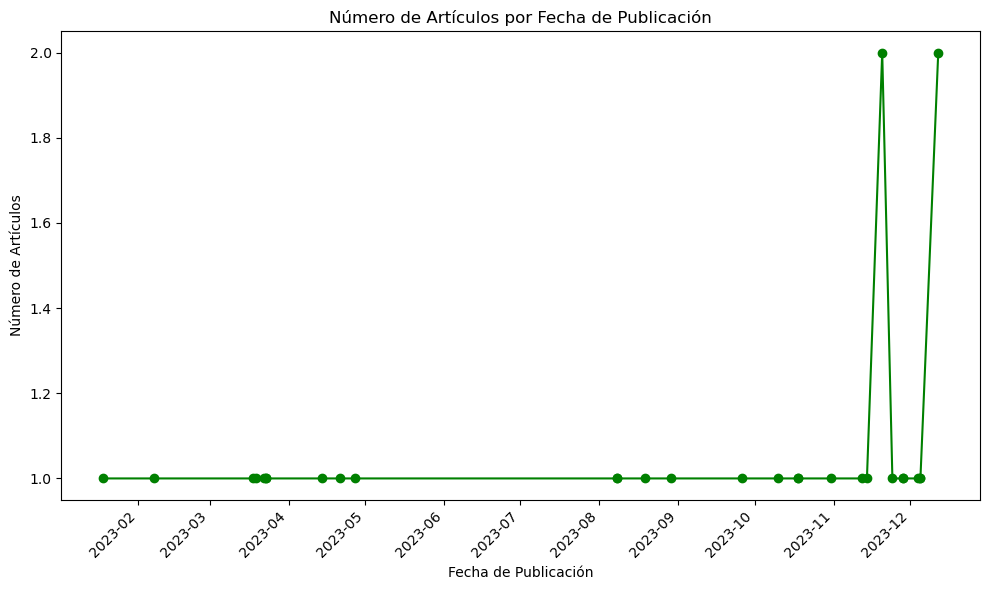

In [87]:
# Gráfica 3: Artículos por Fecha de Publicación
plt.figure(figsize=(10, 6))
df['Fecha de Publicación'].value_counts().sort_index().plot(kind='line', marker='o', linestyle='-', color='green')
plt.xlabel('Fecha de Publicación')
plt.ylabel('Número de Artículos')
plt.title('Número de Artículos por Fecha de Publicación')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [89]:
# Escribir los datos extraídos en un archivo CSV
with open('datos_extraidoselespectador_descriptivo.csv', 'w', newline='', encoding='utf-8-sig') as archivo:
    escritor_csv = csv.writer(archivo)
    # Escribir la cabecera
    escritor_csv.writerow(["Autor", "Fecha de Publicación", "Número de Palabras", "Nombre del Periódico"])
    # Escribir los datos
    for index, row in df.iterrows():
        escritor_csv.writerow(row)